In [1]:
# Importing Library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import collections as c
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Importing data
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Information about the shape and the size
print(digits.data.shape)
print (digits.images.shape)


(1797, 64)
(1797, 8, 8)


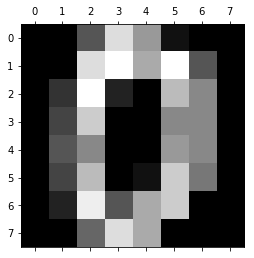

In [3]:
 plt.gray() 
 plt.matshow(digits.images[0]) 
 plt.show() 

In [4]:
# =============================================================================
#  Manual KNN Method
# =============================================================================

# Divide the data into TRAIN and TEST sets
n_samples = len(X_digits)


X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

In [5]:
# Manual KNN function 
#==============================================================================

def predict(X_train, y_train, x_test, k):
	# create list for distances and targets
	distances = []
	targets = []

	for i in range(len(X_train)):
		# first we compute the euclidean distance
		distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
		# add it to list of distances
		distances.append([distance, i])

	# sort the list
	distances = sorted(distances)

	# make a list of the k neighbors' targets
	for i in range(k):
		index = distances[i][1]
		targets.append(y_train[index])

	# return most common target
	return c.Counter(targets).most_common(1)[0][0]

def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
	# check if k larger than n
	if k > len(X_train):
		raise ValueError

	# predict for each testing observation
	for i in range(len(X_test)):
		predictions.append(predict(X_train, y_train, X_test[i, :], k))
        
#==============================================================================		


In [6]:
# making our predictions 
predictions = []
try:
	kNearestNeighbor(X_train, y_train, X_test, predictions, 7)#number to change
	predictions = np.asarray(predictions)

	# evaluating accuracy
	accuracy = accuracy_score(y_test, predictions) * 100
	print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
	print('Can\'t have more neighbors than training samples!!')
    


The accuracy of OUR classifier is 96%


In [10]:
# SEARCHING FOR OPTIMAL K VALUE:

# list of possible K values
kList = list(range(1, 25, 1))

# empty list for storing scores
scores = []

# run knn with diferent K values
for k in kList:
    predictions = []
    kNearestNeighbor(X_train, y_train, X_test, predictions, k)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)

# determining best K
optimalK = scores.index(max(scores)) + 1
print('Optimal K Value is: ', optimalK)

Optimal K Value is:  4


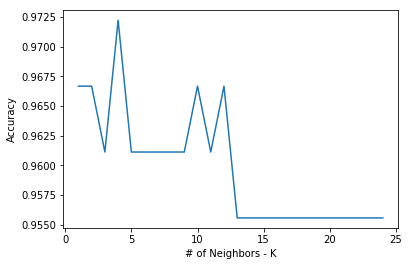

In [11]:
# plot results
plt.plot(kList, scores)
plt.xlabel('# of Neighbors - K')
plt.ylabel('Accuracy')
plt.show()

In [12]:
# making our predictions With The new Value of K
predictions = []
try:
	kNearestNeighbor(X_train, y_train, X_test, predictions, optimalK)
	predictions = np.asarray(predictions)

	# evaluating accuracy
	accuracy = accuracy_score(y_test, predictions) * 100
	print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
   print('Can\'t have more neighbors than training samples!!')


The accuracy of OUR classifier is 97%


In [13]:
# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))
print("CONFUSION MATRIX ON TESTING DATA")
print(confusion_matrix(y_test,predictions))


EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.95      1.00      0.97        19
          2       1.00      1.00      1.00        17
          3       0.94      0.89      0.91        18
          4       1.00      1.00      1.00        20
          5       0.90      1.00      0.95        18
          6       1.00      1.00      1.00        18
          7       1.00      1.00      1.00        19
          8       0.94      0.94      0.94        17
          9       1.00      0.89      0.94        18

avg / total       0.97      0.97      0.97       180

CONFUSION MATRIX ON TESTING DATA
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  1  0  0  1  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  1  0  0  0  0  0  0 16  0]
 [ 0

In [14]:
# =============================================================================
#   Sklearn KNN 
# =============================================================================

# Training and testing split,
# 75% for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(digits.data), digits.target, test_size=0.25, random_state=42)



In [15]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []

# loop over kVals
for k in range(1, 30, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(testData, testLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))


k=1, accuracy=98.22%
k=3, accuracy=98.67%
k=5, accuracy=99.33%
k=7, accuracy=99.33%
k=9, accuracy=98.67%
k=11, accuracy=98.00%
k=13, accuracy=98.00%
k=15, accuracy=98.22%
k=17, accuracy=98.00%
k=19, accuracy=97.78%
k=21, accuracy=97.78%
k=23, accuracy=97.78%
k=25, accuracy=97.33%
k=27, accuracy=97.11%
k=29, accuracy=97.11%
k=5 achieved highest accuracy of 99.33% on validation data


In [16]:
# Now re-train the classifier With the best K
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

In [18]:
# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))
print("CONFUSION MATRIX ON TESTING DATA")
print(confusion_matrix(testLabels,predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00        37
          2       1.00      1.00      1.00        38
          3       1.00      1.00      1.00        46
          4       0.98      1.00      0.99        55
          5       0.98      0.98      0.98        59
          6       1.00      1.00      1.00        45
          7       1.00      1.00      1.00        41
          8       1.00      1.00      1.00        38
          9       0.98      0.96      0.97        48

avg / total       0.99      0.99      0.99       450

CONFUSION MATRIX ON TESTING DATA
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0